In [120]:
# Application of Decision tree and Random forest classifier algorithm to build data model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC

# reading data
data=pd.read_csv('C:/Users/donad/OneDrive/Desktop/Internship/1_Machine Learning/4_Supervised_Learning/Classification/Datasets/heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [121]:
# check for null value
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [122]:
# check for dupplicates
data.duplicated().sum()

0

In [123]:
# splitting to train and test
train, test=train_test_split(data,test_size=0.2)
trainx=train.iloc[:,0:12]
trainy=train.iloc[:,12]
testx=test.iloc[:,0:12]
testy=test.iloc[:,12]

# model building
dt=DTC(criterion='entropy')
modeldt=dt.fit(trainx,trainy).predict(testx)
modeldt

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [124]:
testy

142    0
183    1
190    0
278    0
68     1
267    0
83     0
74     1
125    0
137    0
84     1
136    0
36     1
240    0
247    0
80     0
246    1
2      1
73     0
25     1
192    0
46     1
284    0
139    0
176    0
266    1
201    0
173    0
250    0
6      1
167    1
51     1
132    0
27     1
221    0
115    0
289    0
15     1
64     0
174    0
3      1
100    0
130    0
76     0
156    0
265    0
214    0
126    1
50     1
171    0
213    1
1      1
168    0
138    0
29     1
63     1
43     0
225    0
81     0
116    0
Name: DEATH_EVENT, dtype: int64

In [125]:
# accuracy of decision tree
accdt=np.mean(modeldt==testy)
accdt

0.8333333333333334

[Text(0.4010416666666667, 0.9444444444444444, 'x[11] <= 73.5\nentropy = 0.893\nsamples = 239\nvalue = [165, 74]'),
 Text(0.1, 0.8333333333333334, 'x[8] <= 134.5\nentropy = 0.663\nsamples = 58\nvalue = [10, 48]'),
 Text(0.06666666666666667, 0.7222222222222222, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.13333333333333333, 0.7222222222222222, 'x[2] <= 109.5\nentropy = 0.852\nsamples = 36\nvalue = [10, 26]'),
 Text(0.06666666666666667, 0.6111111111111112, 'x[6] <= 213500.0\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.03333333333333333, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.2, 0.6111111111111112, 'x[11] <= 67.5\nentropy = 0.663\nsamples = 29\nvalue = [5, 24]'),
 Text(0.16666666666666666, 0.5, 'x[5] <= 0.5\nentropy = 0.503\nsamples = 27\nvalue = [3, 24]'),
 Text(0.13333333333333333, 0.3888888888888889, 'x[8] <= 139.0\nentropy = 0.75\nsamples = 14\nvalue = [3, 11]'),
 Text(0.1, 0.277

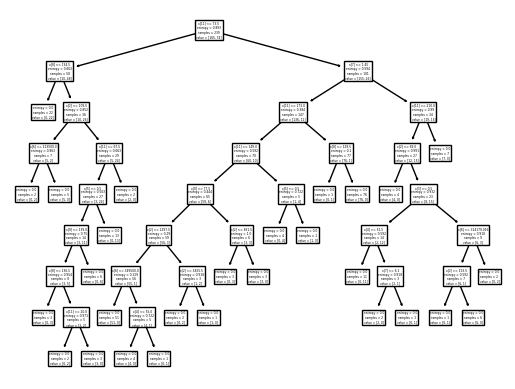

In [126]:
# plotting tree
from sklearn import tree
tree.plot_tree(dt)

In [127]:
# Random forest model building
rf=RFC(n_jobs=12,n_estimators=100,oob_score=True,criterion='entropy')
predrf=rf.fit(trainx,trainy).predict(testx)
predrf

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [128]:
testy

142    0
183    1
190    0
278    0
68     1
267    0
83     0
74     1
125    0
137    0
84     1
136    0
36     1
240    0
247    0
80     0
246    1
2      1
73     0
25     1
192    0
46     1
284    0
139    0
176    0
266    1
201    0
173    0
250    0
6      1
167    1
51     1
132    0
27     1
221    0
115    0
289    0
15     1
64     0
174    0
3      1
100    0
130    0
76     0
156    0
265    0
214    0
126    1
50     1
171    0
213    1
1      1
168    0
138    0
29     1
63     1
43     0
225    0
81     0
116    0
Name: DEATH_EVENT, dtype: int64

In [129]:
# random forest accuracy
acc1=np.mean(predrf==testy)
acc1

0.8333333333333334